<a href="https://colab.research.google.com/github/AnisH1427/Multilingual-OCR-FYP/blob/master/Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!cd Model/202402170444

/bin/bash: line 1: cd: Model/202402170444: No such file or directory


In [ ]:
!pwd

/content


In [ ]:
%cd drive/MyDrive

/content/drive/MyDrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pip install mltu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.7/73.7 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.7 MB/s eta 0:00:00
  Created wheel for qqdm: filename=qqdm-0.0.7-py3-none-any.whl size=6468 sha256=074acffce21894133f129554218df97a8dedbb060e924094c00cffdefed802be
  Stored in directory: /root/.cache/pip/wheels/40/1a/56/5dccdea123a172661eb65c8c29fde4567dbda2b72b5fc5893a
Successfully built qqdm


In [ ]:
!pip install opencv-python-headless

In [ ]:
# import cv2
# import typing
# import numpy as np
# from google.colab.patches import cv2_imshow

# from mltu.inferenceModel import OnnxInferenceModel
# from mltu.utils.text_utils import ctc_decoder, get_cer, get_wer
# from mltu.transformers import ImageResizer

# class ImageToWordModel(OnnxInferenceModel):
#     def __init__(self, char_list: typing.Union[str, list], *args, **kwargs):
#         super().__init__(*args, **kwargs)
#         self.char_list = char_list

#     def predict(self, image: np.ndarray):
#         image = ImageResizer.resize_maintaining_aspect_ratio(image, *self.input_shape[:2][::-1])

#         image_pred = np.expand_dims(image, axis=0).astype(np.float32)

#         preds = self.model.run(None, {self.input_name: image_pred})[0]

#         text = ctc_decoder(preds, self.char_list)[0]

#         return text

# if __name__ == "__main__":
#     import pandas as pd
#     from tqdm import tqdm
#     from mltu.configs import BaseModelConfigs

#     configs = BaseModelConfigs.load("Model/202402170444/configs.yaml")

#     model = ImageToWordModel(model_path=configs.model_path, char_list=configs.vocab)

#     df = pd.read_csv("Model/202402170444/val.csv").values.tolist()

#     accum_cer, accum_wer = [], []
#     for image_path, label in tqdm(df):
#         image = cv2.imread(image_path)

#         prediction_text = model.predict(image)

#         cer = get_cer(prediction_text, label)
#         wer = get_wer(prediction_text, label)
#         print("Image: ", image_path)
#         print("Label:", label)
#         print("Prediction: ", prediction_text)
#         print(f"CER: {cer}; WER: {wer}")

#         accum_cer.append(cer)
#         accum_wer.append(wer)

#         display(prediction_text)
#         cv2_imshow(image)
#         cv2.waitKey(0)
#         cv2.destroyAllWindows()

#     print(f"Average CER: {np.average(accum_cer)}, Average WER: {np.average(accum_wer)}")

ParserError: while parsing a block mapping
  in "Model/202402171624/configs.yaml", line 1, column 1
expected <block end>, but found '<scalar>'
  in "Model/202402171624/configs.yaml", line 8, column 62

In [ ]:
!cd Model/202402131147/configs.yaml

/bin/bash: line 1: cd: Model/202402131147/configs.yaml: Not a directory


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

from mltu.inferenceModel import OnnxInferenceModel
from mltu.utils.text_utils import ctc_decoder, get_cer, get_wer
from mltu.transformers import ImageResizer

class ImageToWordModel(OnnxInferenceModel):
    def __init__(self, model_path: str, vocab: list, *args, **kwargs):
        super().__init__(model_path=model_path, *args, **kwargs)
        self.vocab = vocab

    def predict(self, image: np.ndarray):
        image = ImageResizer.resize_maintaining_aspect_ratio(image, *self.input_shape[:2][::-1])
        image_pred = np.expand_dims(image, axis=0).astype(np.float32)
        preds = self.model.run(None, {self.input_name: image_pred})[0]
        text = ctc_decoder(preds, self.vocab)[0]
        return text

if __name__ == "__main__":
    # Model path and vocabulary list
    model_path = "Model/202402171624/model.onnx"
    vocab = ['i', '3', 'O', 'C', 'P', '1', 'p', ',', 'H', '?', '6', 'x', '-', '8', 'g', 'T', 't', '!', 'c', 'G', 'U', 'D', 'V', 'R', 'a', 'u', '#', 'Y', 'Q', '.', ':', '9', 'K', 'b', 'I', 'r', '(', 'j', '&', 'f', 'n', 'Z', 'd', '5', 'L', 'J', '4', 'B', 'v', 'w', ')', "'", 'N', 'm', 'M', 'h', 'k', '*', '7', 'F', 'S', '+', '2', 'q', '"', '0', 'X', 'z', ' ', 'o', 'W', 'e', ';', 'y', 'E', 'A', 's', '/', 'l']

    # Create the model
    model = ImageToWordModel(model_path=model_path, vocab=vocab)

    # Read the image and label
    image_path = "datasets/thank.png"  # Replace with the path to your image
    label = "thank you"  # Replace with the ground truth label of your image

    # Load the image
    image = cv2.imread(image_path)

    # Predict the text
    prediction_text = model.predict(image)

    # Calculate CER and WER
    cer = get_cer(prediction_text, label)
    wer = get_wer(prediction_text, label)

    # Print results
    print("Image:", image_path)
    print("Label:", label)
    print("Prediction:", prediction_text)
    print(f"CER: {cer}; WER: {wer}")

    # Display predicted text and image
    print("Predicted Text:", prediction_text)
    cv2_imshow(image)

AttributeError: 'ImageToWordModel' object has no attribute 'input_shape'

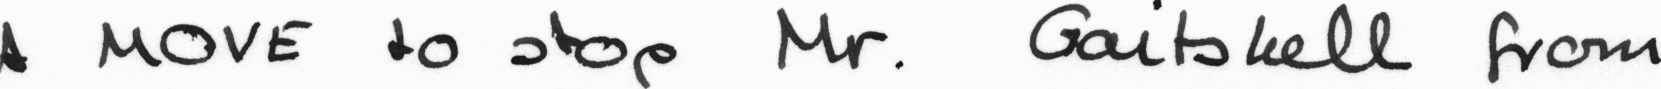

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Load the full-scale image
image = cv2.imread('datasets/formsA-D/a01-000u.png')

# Define the bounding box coordinates of the first line of text
x, y, w, h = 408, 746, 1661, 89  # Example coordinates (replace with actual values)

# Extract the region of interest (first line of text) from the image
roi = image[y:y+h, x:x+w]

# Display the extracted region of interest
cv2_imshow(roi)


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

from mltu.inferenceModel import OnnxInferenceModel
from mltu.utils.text_utils import ctc_decoder
from mltu.transformers import ImageResizer

class ImageToWordModel(OnnxInferenceModel):
    def __init__(self, model_path: str, vocab: list, *args, **kwargs):
        super().__init__(model_path=model_path, *args, **kwargs)
        self.vocab = vocab
        self.height = 96
        self.width = 1408
        self.channel = 3

    def preprocess_image(self, image):
        # Resize image while maintaining aspect ratio
        resized_image = ImageResizer.resize_maintaining_aspect_ratio(image, self.width, self.height)
        # Convert image to RGB if it's grayscale
        if resized_image.ndim == 2:
            resized_image = cv2.cvtColor(resized_image, cv2.COLOR_GRAY2RGB)
        # Resize image to desired dimensions
        resized_image = cv2.resize(resized_image, (self.width, self.height))
        # Normalize pixel values
        normalized_image = resized_image.astype(np.float32) / 255.0
        # Expand dimensions to match model input shape (add batch dimension)
        preprocessed_image = np.expand_dims(normalized_image, axis=0)
        return preprocessed_image

    def predict(self, image: np.ndarray):
        preprocessed_image = self.preprocess_image(image)
        preds = self.model.run(None, {self.input_name: preprocessed_image})[0]
        text = ctc_decoder(preds, self.vocab)[0]
        return text

if __name__ == "__main__":
    # Model path and vocabulary list
    model_path = "Model/202402171624/model.onnx"
    vocab = ['i', '3', 'O', 'C', 'P', '1', 'p', ',', 'H', '?', '6', 'x', '-', '8', 'g', 'T', 't', '!', 'c', 'G', 'U', 'D', 'V', 'R', 'a', 'u', '#', 'Y', 'Q', '.', ':', '9', 'K', 'b', 'I', 'r', '(', 'j', '&', 'f', 'n', 'Z', 'd', '5', 'L', 'J', '4', 'B', 'v', 'w', ')', "'", 'N', 'm', 'M', 'h', 'k', '*', '7', 'F', 'S', '+', '2', 'q', '"', '0', 'X', 'z', ' ', 'o', 'W', 'e', ';', 'y', 'E', 'A', 's', '/', 'l']

    # Create the model
    model = ImageToWordModel(model_path=model_path, vocab=vocab)

    # Read the image and label
    image_path = "datasets/lines/m01/m01-149/m01-149-06.png"  # Replace with the path to your image
    label = "thank you"  # Replace with the ground truth label of your image

    # Load the image
    image = cv2.imread(image_path)

    # Predict the text
    prediction_text = model.predict(image)

    # Print results
    print("Image:", image_path)
    print("Label:", label)
    print("Prediction:", prediction_text)


Image: datasets/lines/m01/m01-149/m01-149-06.png
Label: thank you
Prediction: 


In [ ]:
pip install pytesseract

In [ ]:
pytesseract.pytesseract.tesseract_cmd = r'/usr/local/bin/pytesseract'

In [ ]:
pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 25.3 MB/s eta 0:00:00


In [ ]:
# import cv2
# import easyocr
# import numpy as np
# from google.colab.patches import cv2_imshow

# # Static image path
# image_path = "/content/drive/MyDrive/datasets/formsA-D/a01-000u.png"

# # Step 1: Load the image
# image = cv2.imread(image_path)

# # Check if the image is None
# if image is None:
#     raise ValueError("Invalid image file or path.")

# # Step 2: Preprocess the image
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# blur = cv2.GaussianBlur(gray, (3, 3), 0)
# bw = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# # selected a kernel with more width so that we want to connect lines
# kernel_size = (15, 1)
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)

# # Step 3: Perform the closing operation: Dilate and then close
# bw_closed = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, kernel)

# # Find contours for each text line
# contours, _ = cv2.findContours(bw_closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Filter contours to select those whose width is at least 3 times its height
# filtered_contours = [cnt for cnt in contours if (cv2.boundingRect(cnt)[2] / cv2.boundingRect(cnt)[3])>=3.0]

# # Sort contours based on y-coordinate
# sorted_contours = sorted(filtered_contours, key=lambda contour: cv2.boundingRect(contour)[1])

# padding=3
# for contour in sorted_contours:
#     x, y, w, h = cv2.boundingRect(contour)
#     x, y, w, h = (x-padding, y-padding, w+padding, h+padding)
#     cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
#     # Recognize each line. Crop the image for each line and pass to OCR engine.
#     line_image = image[y:y + h, x:x+w]

#     # Initialize EasyOCR reader
#     reader = easyocr.Reader(['en'])
#     result = reader.readtext(line_image)
#     # line_text = result[0][-2]

#     # print(line_text)

# # Display the image with text lines detected
# cv2_imshow(image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [ ]:
import cv2
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (9.0, 9.0)

%matplotlib inline

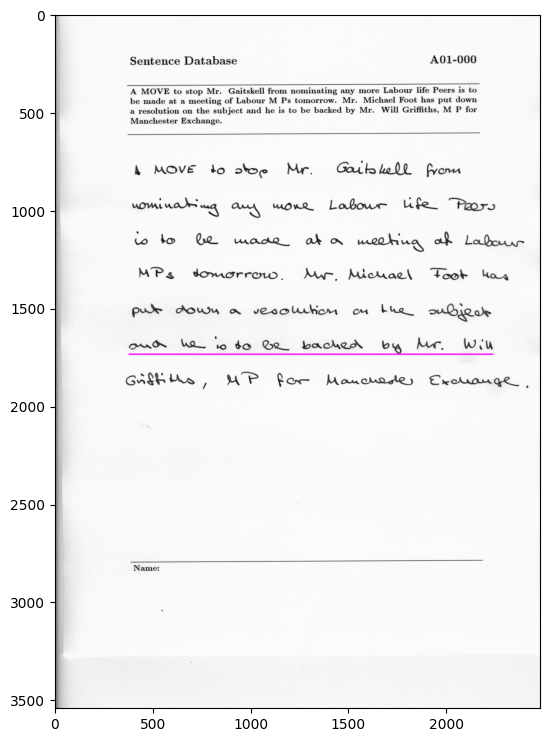

In [ ]:
# Draw a circle
test =  cv2.imread("datasets/formsA-D/a01-000u.png", cv2.IMREAD_COLOR)

cv2.rectangle(test, (377, 1733), (2234, 1733), (255, 0, 255), thickness=5, lineType=cv2.LINE_8)

# Display the image
plt.imshow(test[:,:,::-1])

Bounding Boxes: [((0, 0), (0, 0)), ((0, 0), (0, 0)), ((0, 0), (0, 0)), ((0, 0), (0, 0))]


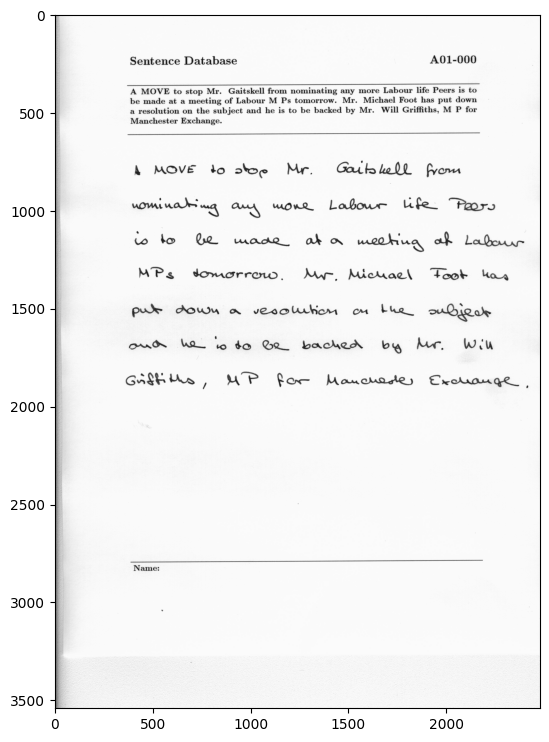

In [ ]:
import cv2
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

# Load the XML file
tree = ET.parse("datasets/xml/a01-000u.xml")
root = tree.getroot()

# Extract bounding box coordinates for machine-printed text
machine_printed_lines = root.findall("./machine-printed-part/machine-print-line")
bounding_boxes = []
for line in machine_printed_lines:
    # Extract bounding box coordinates from attributes or child elements
    x = int(line.get('x', 0))
    y = int(line.get('y', 0))
    width = int(line.get('width', 0))
    height = int(line.get('height', 0))
    x_max = x + width
    y_max = y + height
    bounding_boxes.append(((x, y), (x_max, y_max)))

print("Bounding Boxes:", bounding_boxes)  # Print extracted bounding box coordinates

# Load the image
image = cv2.imread("datasets/formsA-D/a01-000u.png")

# Draw rectangles around the bounding boxes of machine-printed text
for box in bounding_boxes:
    cv2.rectangle(image, box[0], box[1], (255, 0, 255), thickness=5, lineType=cv2.LINE_8)

# Display the image
plt.imshow(image[:,:,::-1])
plt.show()

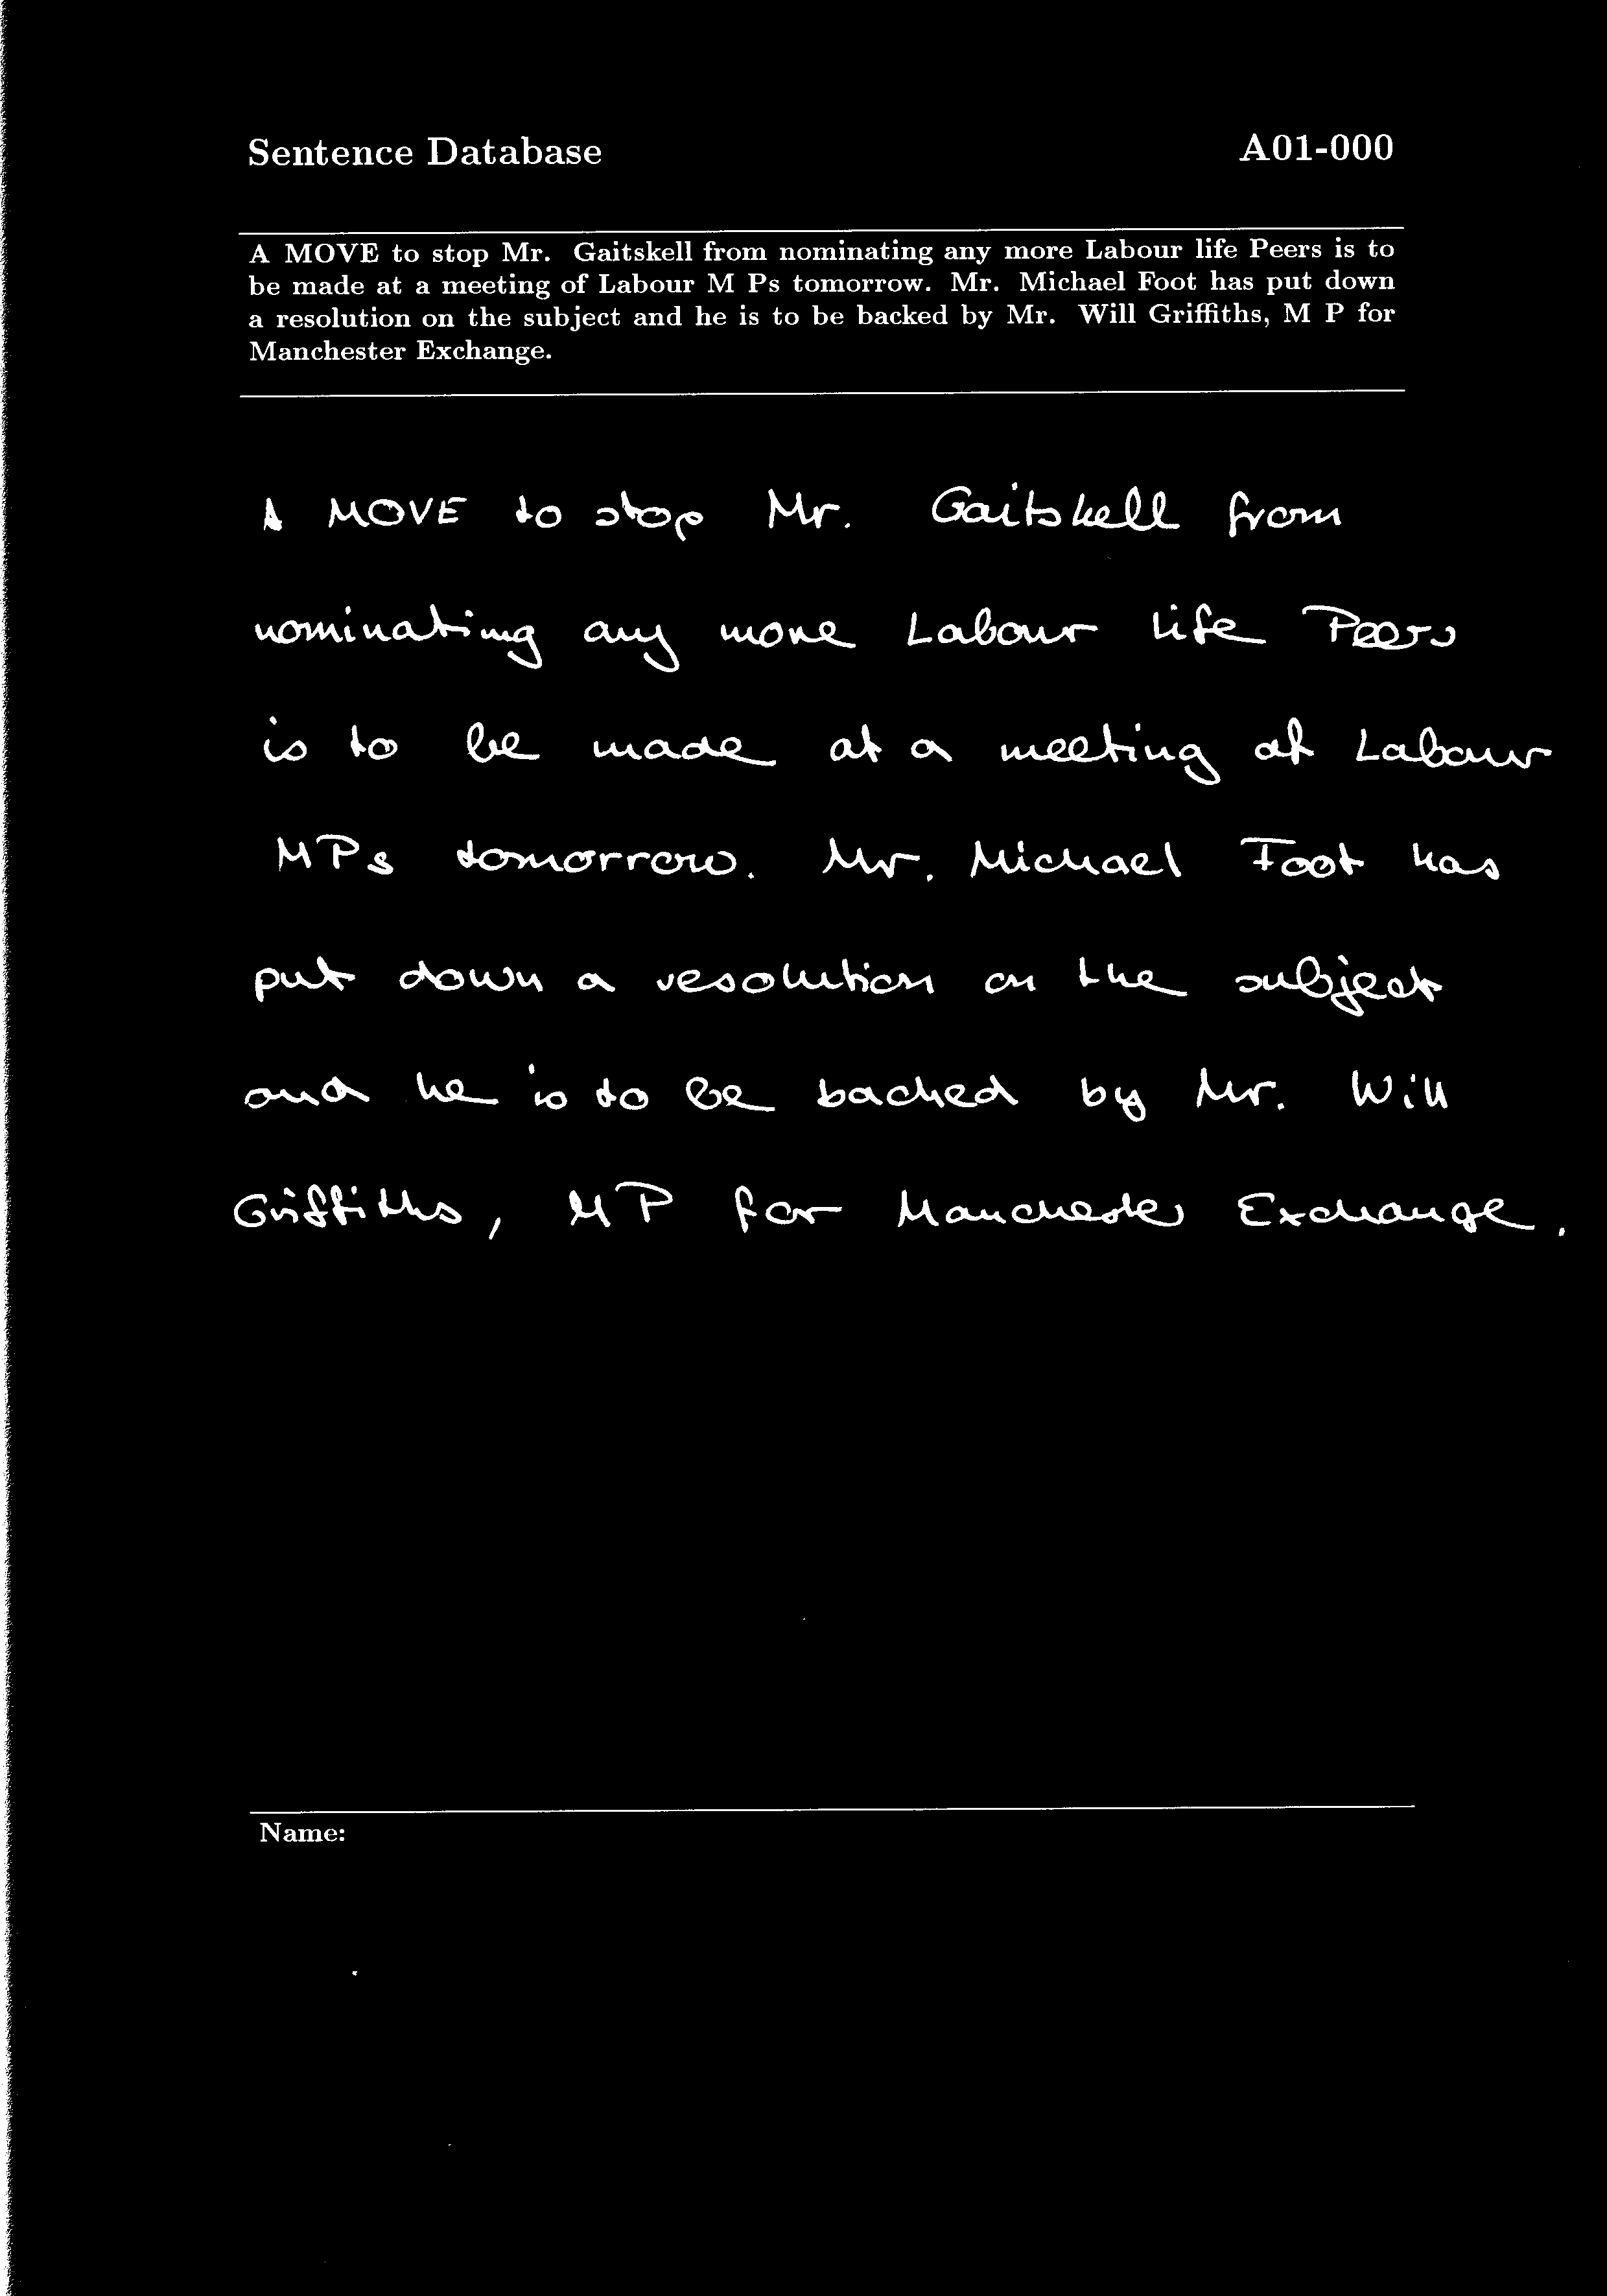

In [ ]:
# Load the image
image = cv2.imread('datasets/formsA-D/a01-000u.png')

# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray,150,255,cv2.THRESH_BINARY_INV)
cv2_imshow(thresh)

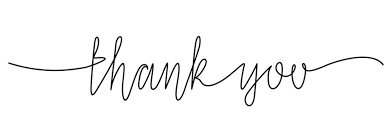

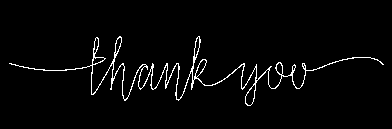

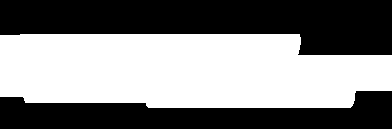

ROI shape :  (74, 392, 3)


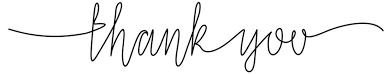

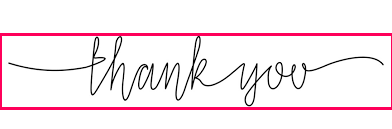

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
# image = cv2.imread('datasets/formsA-D/a01-000u.png')

image = cv2.imread('datasets/thank.png')

# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

# Convert grayscale image to binary
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(thresh)

# Dilation
kernel = np.ones((5, 200), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)
cv2_imshow(img_dilation)

# Find contours
contours, hierarchy = cv2.findContours(img_dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours
sorted_ctrs = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

# Loop over sorted contours
for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)

    # Getting ROI
    roi = image[y:y+h, x:x+w]
    roi_row = roi.shape[0]
    roi_col = roi.shape[1]

    # Show ROI
    if(roi_row>3000 or roi_row<=20 or roi_row<=10 or roi_col<=110):
      continue
    print("ROI shape : ", roi.shape)
    cv2_imshow(roi)

    # cv2.imwrite("datasets/segmentation/segment_no_" + str(i) + ".png", roi)
    cv2.rectangle(image, (x, y), (x + w, y + h), (90, 0, 255), 2)
    cv2.waitKey(0)

# Write the final image with bounding boxes
# cv2.imwrite('datasets/segmentation/final_bounded_box_image.png', image)
# cv2_imshow(image)


0
30 617


1
39 825


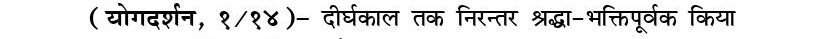

2
39 454


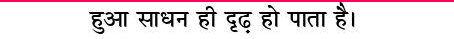

3
39 593


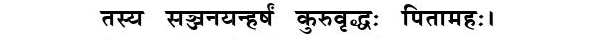

4
41 659


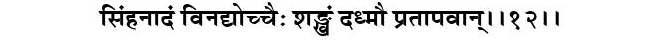

5
37 775


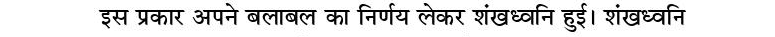

6
35 825


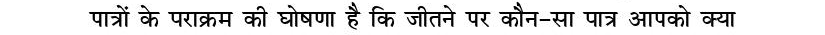

7
39 825


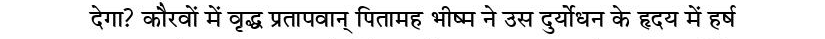

8
37 825


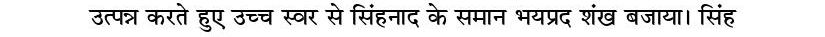

9
40 825


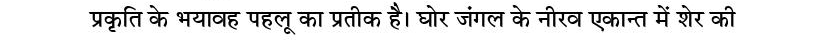

10
37 825


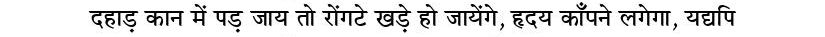

11
40 825


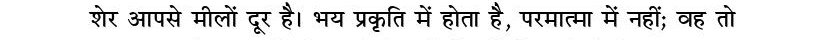

12
37 825


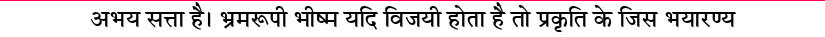

13
37 825


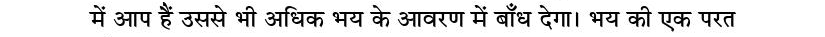

14
38 825


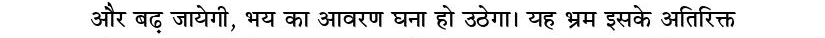

15
39 825


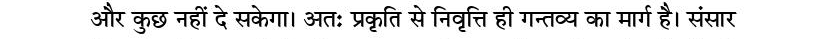

16
37 825


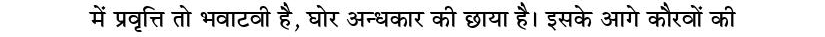

17
39 825


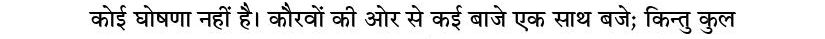

18
39 825


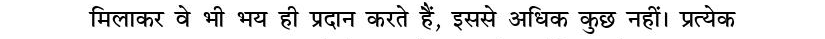

19
39 815


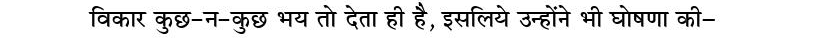

20
77 652


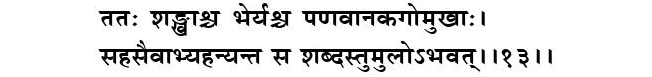

21
38 775


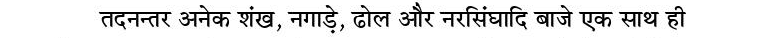

22
37 825


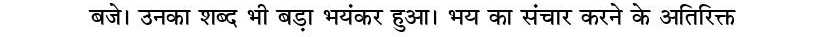

23
39 825


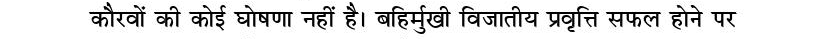

24
35 515


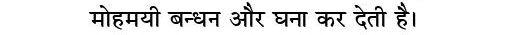

25
38 774


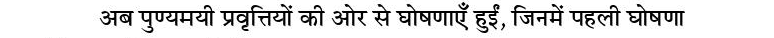

26
37 406


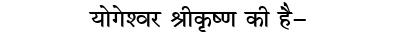

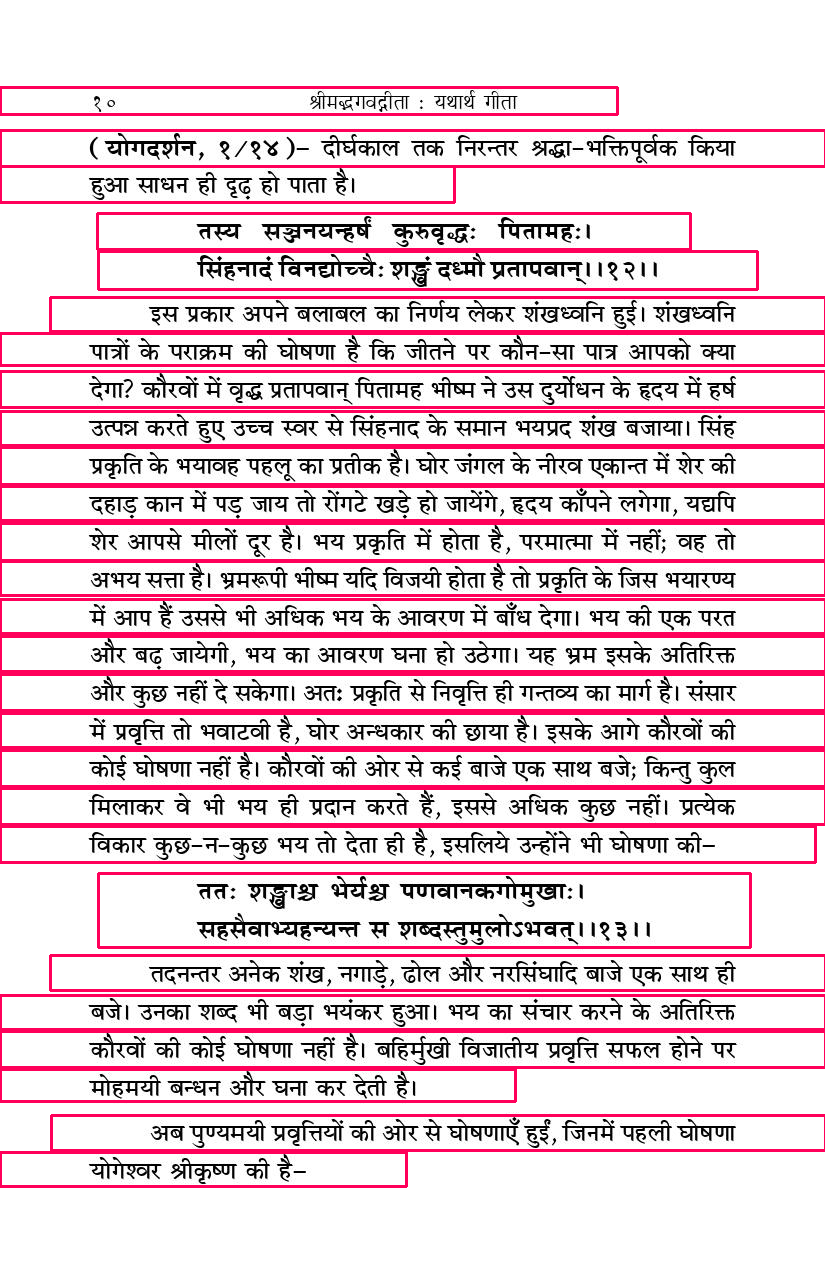

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

if __name__ == "__main__":
  image = cv2.imread('datasets/0010_jpg.rf.e7741188a2afa6db3dee4324e8486a34.jpg')

  # Display the image
  # cv2_imshow(image)

  # Convert image to grayscale
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  # cv2_imshow(gray)

  # Convert grayscale image to binary
  ret, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)
  # cv2_imshow(thresh)

   # Apply Canny edge detection
  edges = cv2.Canny(thresh, 50, 150)  # Adjust the threshold values as needed
  # cv2_imshow(edges)

  # Dilation
  kernel = np.ones((5, 200), np.uint8)
  img_dilation = cv2.dilate(edges, kernel, iterations=1)
  # cv2_imshow(img_dilation)

  # Find contours
  contours, hierarchy = cv2.findContours(img_dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Sort contours based on their bounding box coordinates
  bounding_boxes = [cv2.boundingRect(ctr) for ctr in contours]
  sorted_contours = [ctr for _, ctr in sorted(zip(bounding_boxes, contours), key=lambda pair: pair[0][1])]

  # Loop over sorted contours
  for i, ctr in enumerate(sorted_contours):
      # Get bounding box
      x, y, w, h = cv2.boundingRect(ctr)

      # Getting ROI
      roi = image[y:y+h+3, x:x+w]
      roi_row = roi.shape[0]
      roi_col = roi.shape[1]

      # Show ROI
      if(roi_row>3000 or roi_row<=20 or roi_row<=10 or roi_col<=110):
          continue
      print(i)
      print(roi_row,roi_col)
      # if(roi_row>60):
      #   roi_edges = cv2.Canny(roi, 50, 150)
      #   roi_contours, _ = cv2.findContours(roi_edges,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
      #   for roi_ctr in roi_contours:
      #     roi_x, roi_y, roi_w, roi_h = cv2.boundingRect(roi_ctr)
      #     cv2.rectangle(image, (x+roi_x,y+roi_y),(x+roi_x+roi_w,y+roi_y+roi_h),(90,0,255),2)
      #     cv2_imshow(roi)
      cv2_imshow(roi)
      cv2.rectangle(image, (x, y), (x + w, y + h), (90, 0, 255), 2)

  cv2_imshow(image)


Predicted Text : 

Anlonnn
Sentence Natabase
o o to Mr Gaitskel for oninatis a aore tabour lte fere s tot
heTe sad f atie of tbo t totor Fr t t tot t t 
pepesalufio o the subiect ad he ist be backed bo Mr. Ml Gritr o 
Manckester Fixchanpe .
A MOVE to stop Mr. Gaitskell from
nominating any more Labour life Peers
is to be made at a meeting of Labour
Ps tomorrow . Mr. Michael Foot has
put down a resolution on the subject
and he is to be backed by Mr. Will
Griffiths , P for Manchesder Exchange .
Nramnas


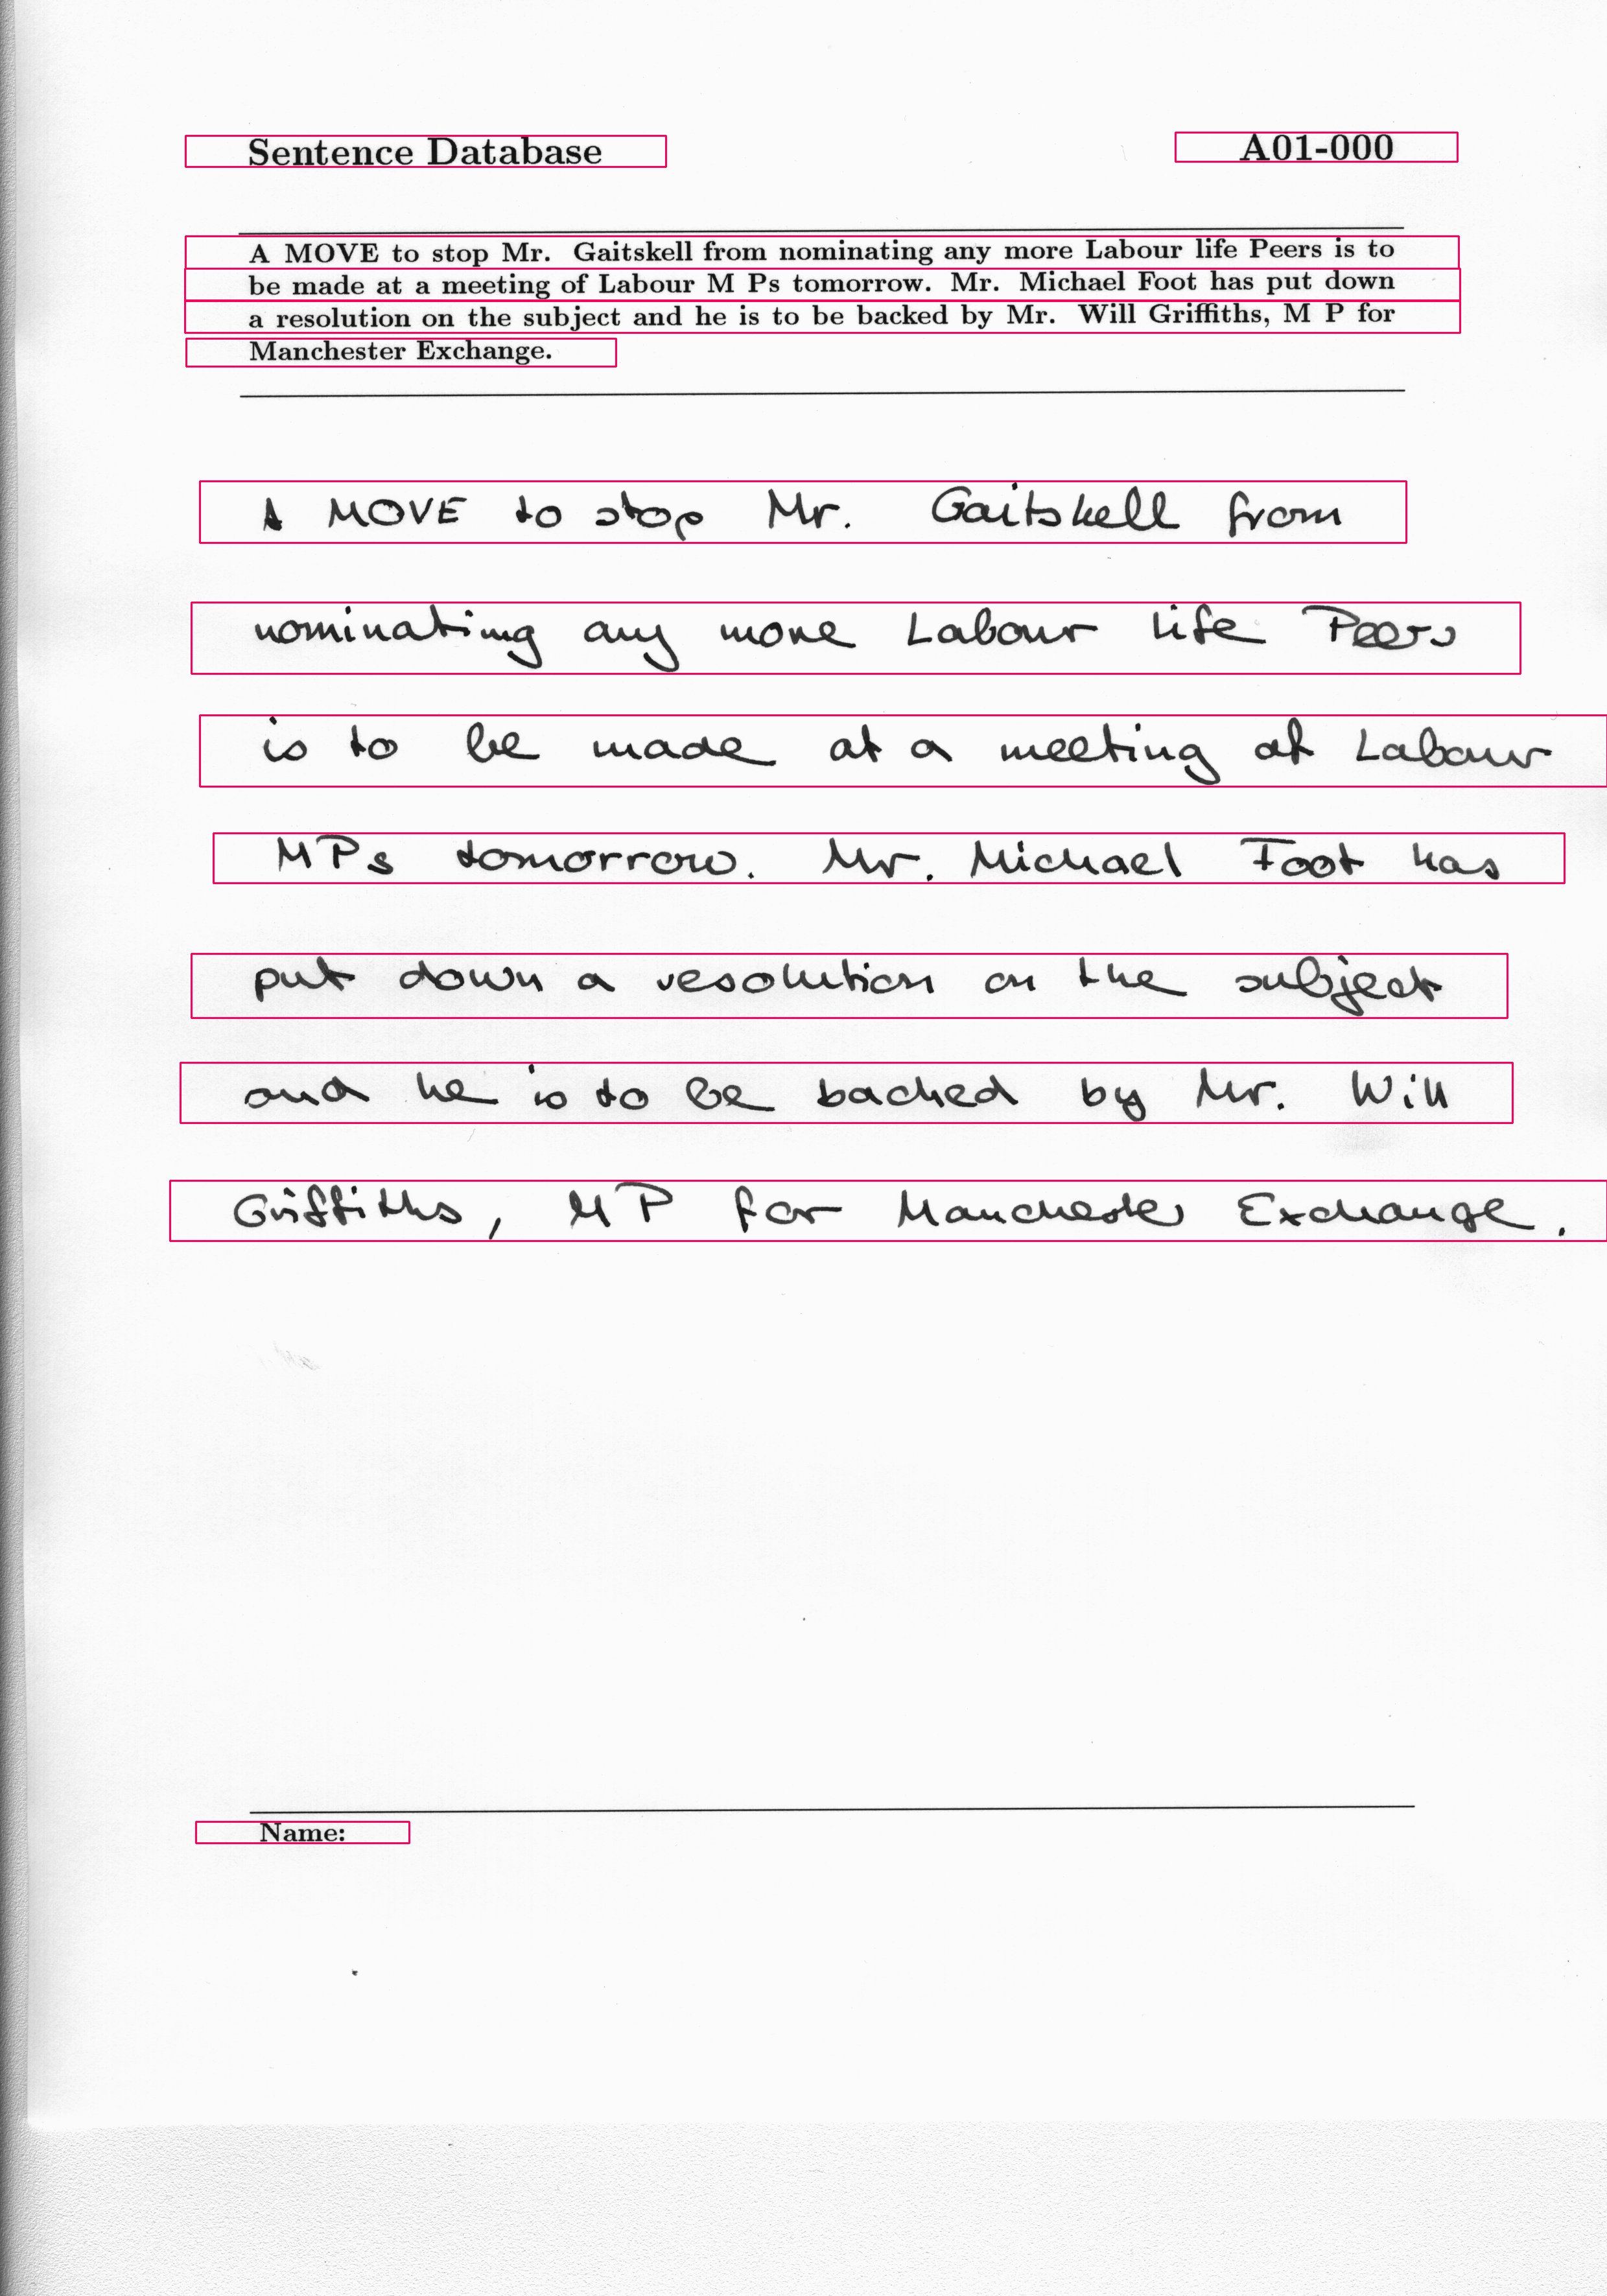

In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow
from mltu.inferenceModel import OnnxInferenceModel
from mltu.utils.text_utils import ctc_decoder
from mltu.transformers import ImageResizer

class ImageToWordModel(OnnxInferenceModel):
    def __init__(self, char_list, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.char_list = char_list

    def predict(self, image):
        image = ImageResizer.resize_maintaining_aspect_ratio(image, *self.input_shapes[0][1:3][::-1])
        image_pred = np.expand_dims(image, axis=0).astype(np.float32)
        preds = self.model.run(self.output_names, {self.input_names[0]: image_pred})[0]
        text = ctc_decoder(preds, self.char_list)[0]
        return text

if __name__ == "__main__":
  from mltu.configs import BaseModelConfigs

  configs = BaseModelConfigs.load("Model/202403031722/configs.yaml")

  model = ImageToWordModel(model_path=configs.model_path, char_list=configs.vocab)

  image = cv2.imread('datasets/formsA-D/a01-000u.png')

  # Display the image
  # cv2_imshow(image)

  # Convert image to grayscale
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  # cv2_imshow(gray)

  # Convert grayscale image to binary
  ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
  # cv2_imshow(thresh)

  # Dilation
  kernel = np.ones((5, 200), np.uint8)
  img_dilation = cv2.dilate(thresh, kernel, iterations=1)
  # cv2_imshow(img_dilation)

  # Find contours
  contours, hierarchy = cv2.findContours(img_dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Sort contours based on their bounding box coordinates
  bounding_boxes = [cv2.boundingRect(ctr) for ctr in contours]
  sorted_contours = [ctr for _, ctr in sorted(zip(bounding_boxes, contours), key=lambda pair: pair[0][1])]

  # Create a list to store predicted texts
  predicted_texts = []

  print("Predicted Text : \n")
  # Loop over sorted contours
  for i, ctr in enumerate(sorted_contours):
      # Get bounding box
      x, y, w, h = cv2.boundingRect(ctr)

      # Getting ROI
      roi = image[y:y+h, x:x+w]
      roi_row = roi.shape[0]
      roi_col = roi.shape[1]

      # Show ROI
      if(roi_row>3000 or roi_row<=20 or roi_row<=10 or roi_col<=110):
          continue
      # Predict text from the image
      prediction_text = model.predict(roi)

      # Append the prediction along with the bounding box coordinates to the list
      predicted_texts.append((x, y, prediction_text))
      cv2.rectangle(image, (x, y), (x + w, y + h), (90, 0, 255), 2)
  # Sort the list based on y-coordinate, then x-coordinate
  sorted_predictions = sorted(predicted_texts, key=lambda x: (x[1], x[0]))

  # Print the sorted predictions
  for x, y, prediction_text in sorted_predictions:
      print(prediction_text)
  cv2_imshow(image)
